In [3]:
import numpy as np
import matplotlib.pyplot as plt

# setup animation
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')


# to read an image from a url (io) and convert it to grayscale (color)
from skimage import io,color
# convolution
from scipy.signal import convolve2d

In [4]:
kernelN = 31
kernelWidths = [.5,5,50]

In [5]:
bathtub = io.imread('https://upload.wikimedia.org/wikipedia/commons/6/61/De_nieuwe_vleugel_van_het_Stedelijk_Museum_Amsterdam.jpg')
smooth_bathtub = np.zeros(bathtub.shape)

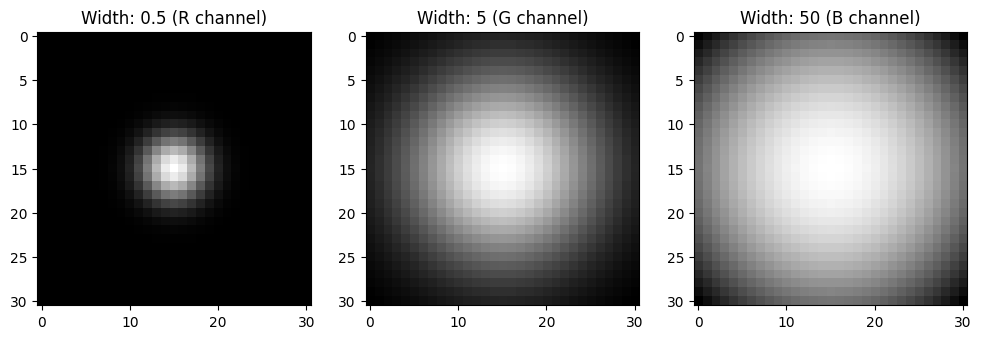

In [9]:
_,axs = plt.subplots(1,3,figsize=(12,6))
for i in range(smooth_bathtub.shape[2]):

  # create kernel
  Y,X     = np.meshgrid(np.linspace(-3, 3 ,kernelN), np.linspace(-3, 3, kernelN))
  kernel  = np.exp( -(X **2 + Y **2) / kernelWidths[i] )
  kernel  = kernel / np.sum(kernel)

  # visualize the kernels
  axs[i].imshow(kernel,cmap='gray')
  axs[i].set_title(f'Width: {kernelWidths[i]} ({"RGB"[i]} channel)')

  # now run convolution
  smooth_bathtub[:,:,i] = convolve2d(bathtub[:,:,i], kernel, mode='same')

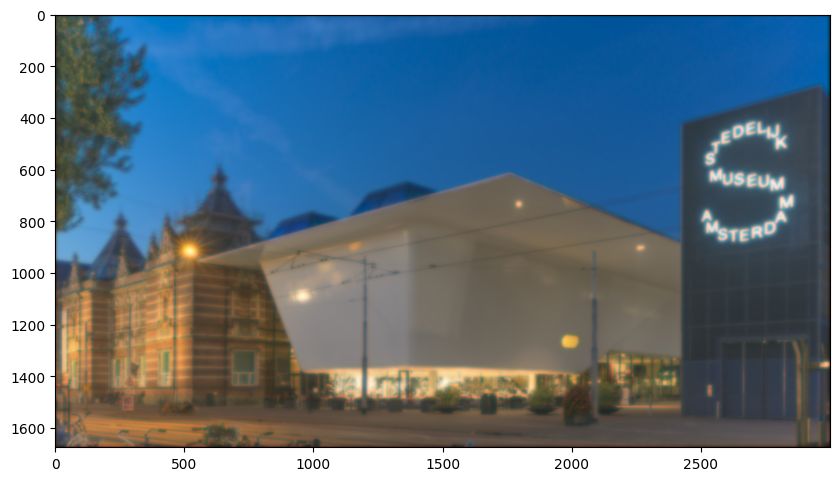

In [10]:
fig = plt.figure(figsize=(10,6))
plt.imshow(smooth_bathtub.astype(np.uint8))
plt.show()